# Wholesale Customers (Clustering)

Data Source: https://archive.ics.uci.edu/dataset/292/wholesale+customers

Github Repo: https://github.com/GHeart01/Wholesale_Customer_Clustering

Youtube Demo: 

### Table of Contents
- [Description](#Description)
- [EDA](#Exploratory-Data-Analysis)
- [Model KMeans](#KMeans-Clustering-Model)
- [Model Hierarchical Clustering](#Hierarchical-Clustering-Model)
- [Hypertuning](#Additional-Visualizations---Hypertuning)
- [Results and Analysis](#Results-and-Analysis)
- [Conclusion](#Conclusion)
- [Citation](#Citation)

### Description

This data from The UC Irving Machine Learning Repository

In this data set we do not have a target variable, so my goal here is to gain information on customer grouping (clustering) based on purchase behavior. I employ my own interpretation to determine the quality of the clustering using silouette score.


### Exploratory Data Analysis

| Feature            | Description                                                          |     
|--------------------|----------------------------------------------------------------------|
| Channel            | Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel           | 
| Region             | Region - Lisbon, Oporto, or Other                                    |
| Fresh              | Annual spending (m.u.) on fresh products                             | 
| Milk               | Annual spending (m.u.) on milk products                              | 
| Grocery            | Annual spending (m.u.) on grocery products                           | 
| Frozen             | Annual spending (m.u.) on frozen products                            | 
| Detergents_Paper   | Annual spending (m.u.) on detergents and paper products              | 
| Delicassen         | Annual spending (m.u.) on delicatessen products                      | 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv("Wholesale_customers_data.csv")

In [3]:
df_data # head, tail, and shape

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Here I drop the catagorical columns Channel and Region as heatmap points generated from those rows wont make a lot of statistical sense.

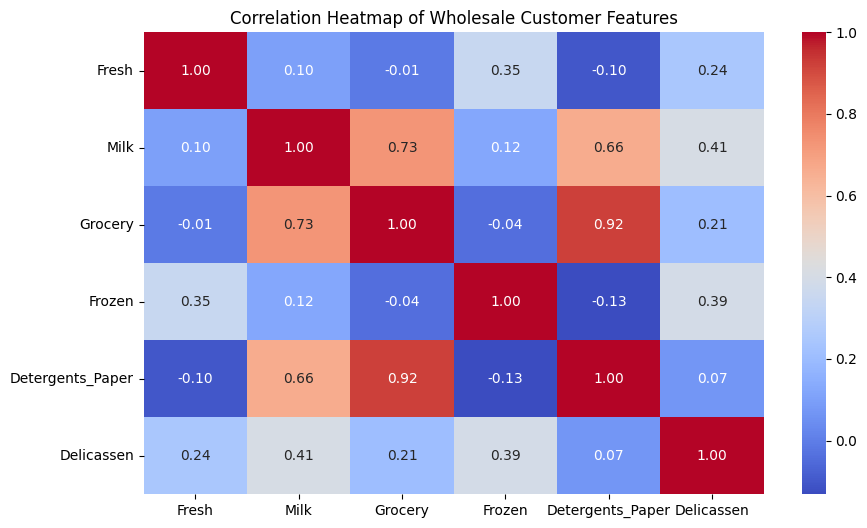

In [6]:
# Drop categorical columns (Region, Channel)
numerical_data = df_data.drop(columns=["Channel", "Region"], errors='ignore')

plt.figure(figsize=(10, 6))
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Wholesale Customer Features")
plt.show()


From this heat map there is very strong correlations between Grocery-Detergents_Paper, Milk-Grocery, Milk-Detergents_Paper. 

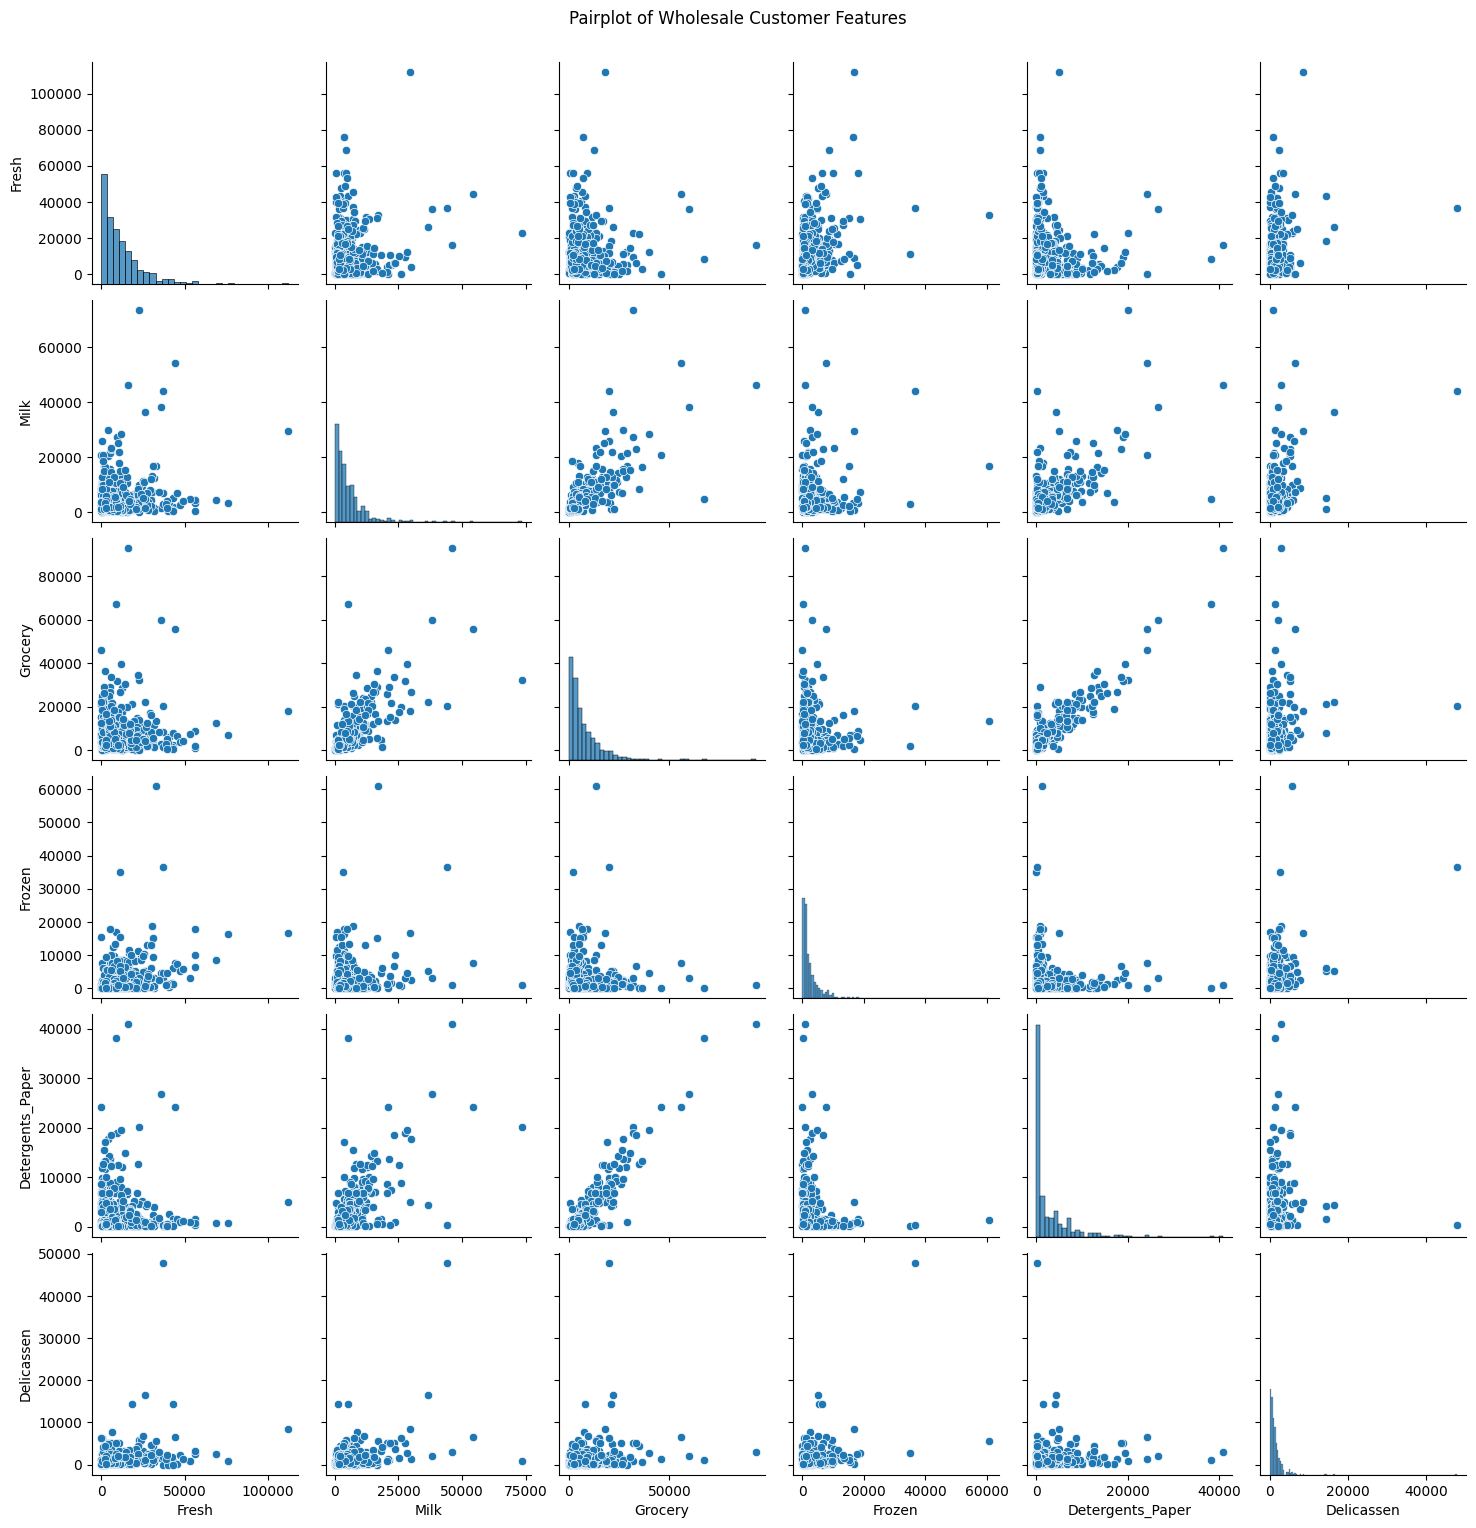

In [7]:
sns.pairplot(numerical_data)
plt.suptitle("Pairplot of Wholesale Customer Features", y=1.02)
plt.show()

Looking at this pairplot table there may be some plots that demonstrate very high or very low spending in certain features. Here we can see that most points are towards the origin, meaning most customers spend very little on most wholesale items. However using the previous heatmap as a guide, I identify grocery-detergents_paper as displaying a clear positive correlation. The means that people who spend a lot on groceries also spend a lot on detergents_paper. I will interpret detergents_paper as cleaning supplies; tissues, toilet paper, paper towels. There is a similar correcltion as well with detergents paper and milk, and grocery-milk. The heatmap and pairplot both indicate the same correlations.

#### Next Ill generate some mean, min, max stats for our data.

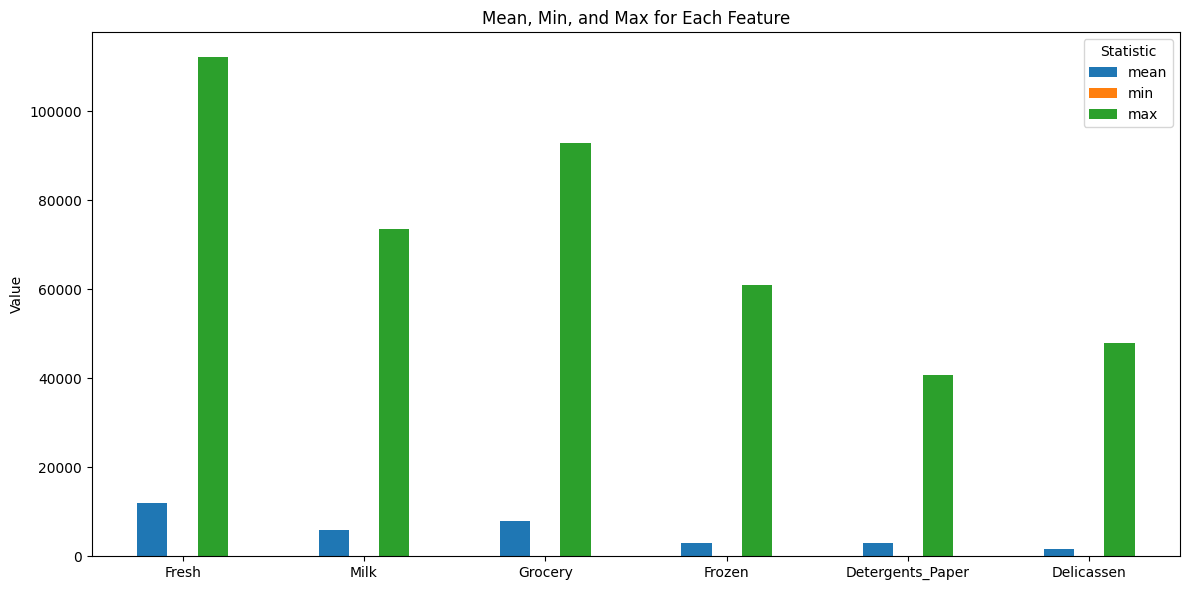

In [8]:
summary_stats = numerical_data.agg(['mean', 'min', 'max']).T  # Transpose for plotting

# Plot
summary_stats.plot(kind='bar', figsize=(12, 6))
plt.title("Mean, Min, and Max for Each Feature")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.legend(title="Statistic")
plt.tight_layout()
plt.show()

The is a rather simple graph for the spending catagories. The most valuable points of data here is that the min for each catagories is 0, or near it. As well as fresh wholesale items representing the highest average spending.

**Apply df.drop to the models before execution**

In [9]:
df_data = df_data.drop(columns=["Channel", "Region"], errors='ignore')

### KMeans Clustering Model

In [10]:
#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
np.random.seed(42)
PCA(n_components=2, svd_solver='randomized')
# Remove non-numeric (if present)
X = df_data.drop(columns=['Channel', 'Region'], errors='ignore')

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.cluster import KMeans

# Try clustering into 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add to original data
df_data['KMeans_Cluster'] = kmeans_labels

### Hierarchical Clustering Model

In [12]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative clustering (Euclidean, Ward)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

# Add to original data
df_data['Hierarchical_Cluster'] = hc_labels

### Visualization

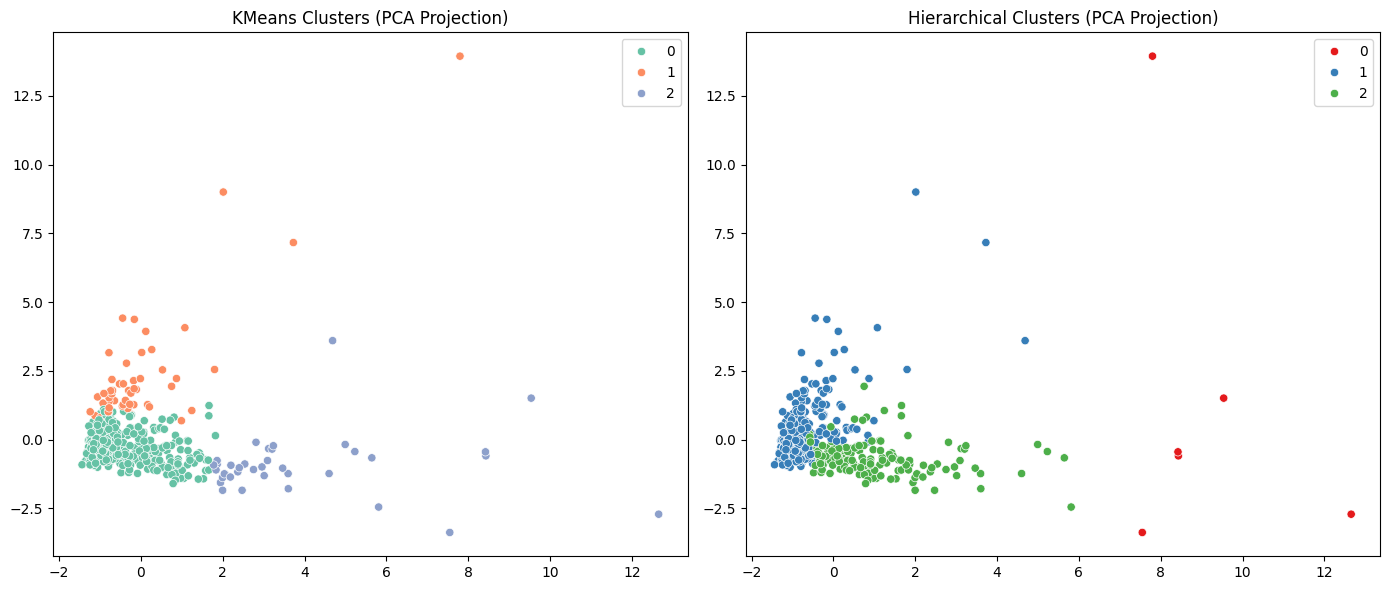

In [13]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot both clustering outputs side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# KMeans
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set2', ax=axs[0])
axs[0].set_title("KMeans Clusters (PCA Projection)")

# Hierarchical
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hc_labels, palette='Set1', ax=axs[1])
axs[1].set_title("Hierarchical Clusters (PCA Projection)")

plt.tight_layout()
plt.show()

Here we see that borth KMeans and Hierarchical CLustering methods have 3 clusters (as specified), similarly to the visual inspection from our heatmap. There is clear overlap between the graphs, However the data separation differences between the two models is noticable; especially if you observe the point in the middle. Lets call the middle point, point M. Kmeans identifies the point M as part of cluster 1 where Hierarchial clustering identifies the point M and part of cluster 0.

The KMeans and Hierarchical clustering methods both show extreme similar graphs under 3 clusters.

#### Additional Visualizations - Hypertuning

#### Here I show the Elbow Method for KMeans clustering

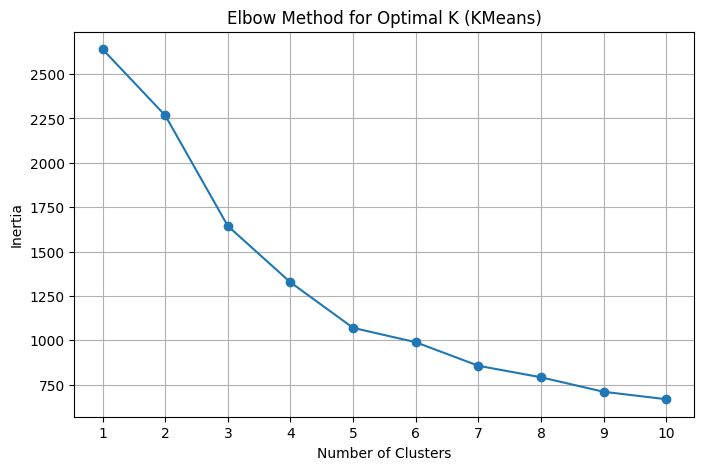

In [14]:
# k-means elbow
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K (KMeans)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)
plt.show()

I have included this elbow graph for KMeans to demonstrate a that the optimal cluster number is where the slope changes less dramatically.

Here I believe that is somewhere where n_clusters >= 3

#### Dendrogram plot for Hierarchical Clustering

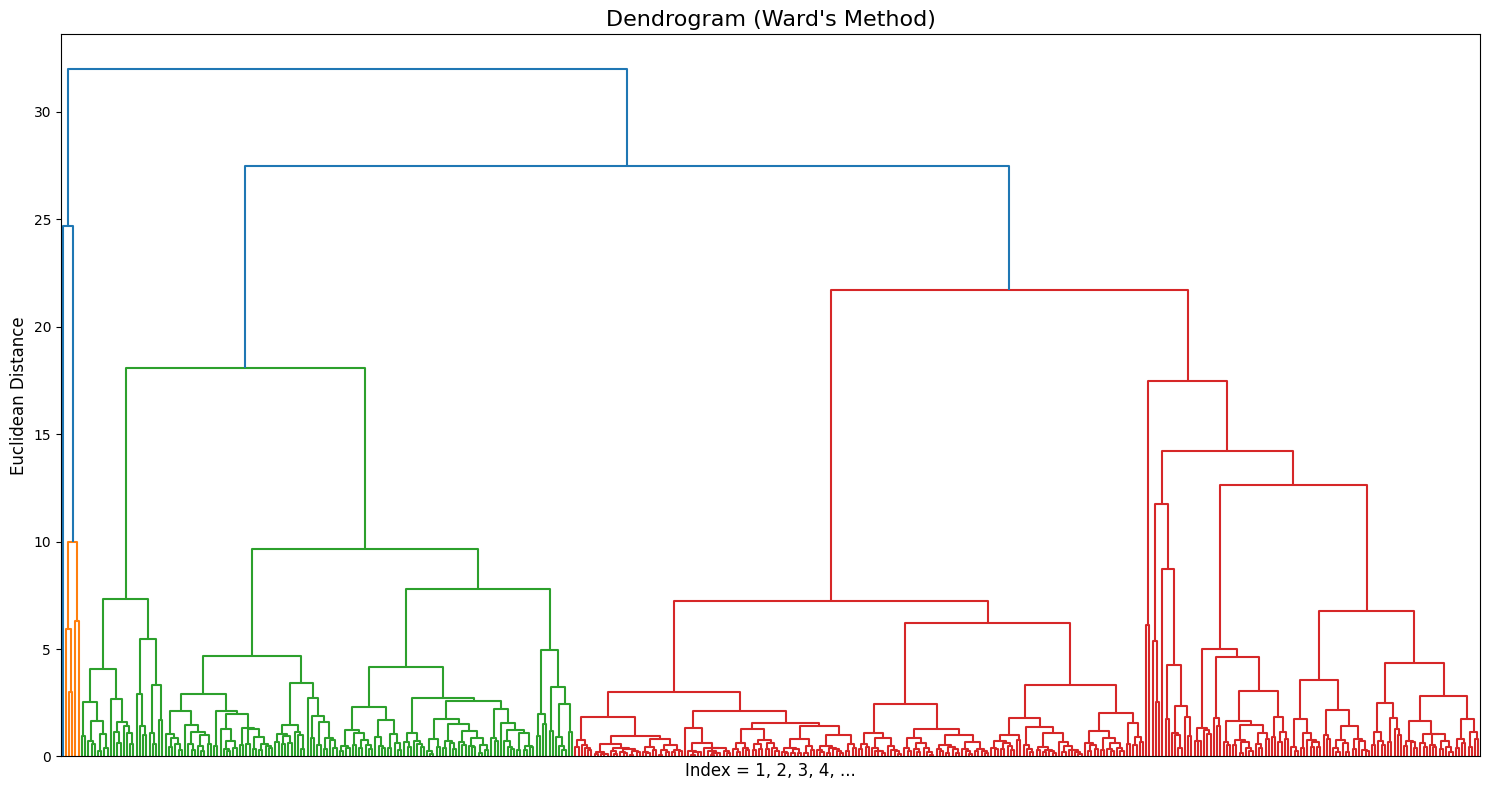

In [15]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'), 
                           no_labels=True)  
plt.title("Dendrogram (Ward's Method)", fontsize=16)
plt.ylabel("Euclidean Distance", fontsize=12)
plt.xlabel("Index = 1, 2, 3, 4, ...", fontsize=12)
plt.tight_layout()
plt.show()


Looking at the dendrogram we can see tigh clustering toward the bottom indictating possible homogenous groups in the dataset. The further and more spread merges suggest heteronormitive data.

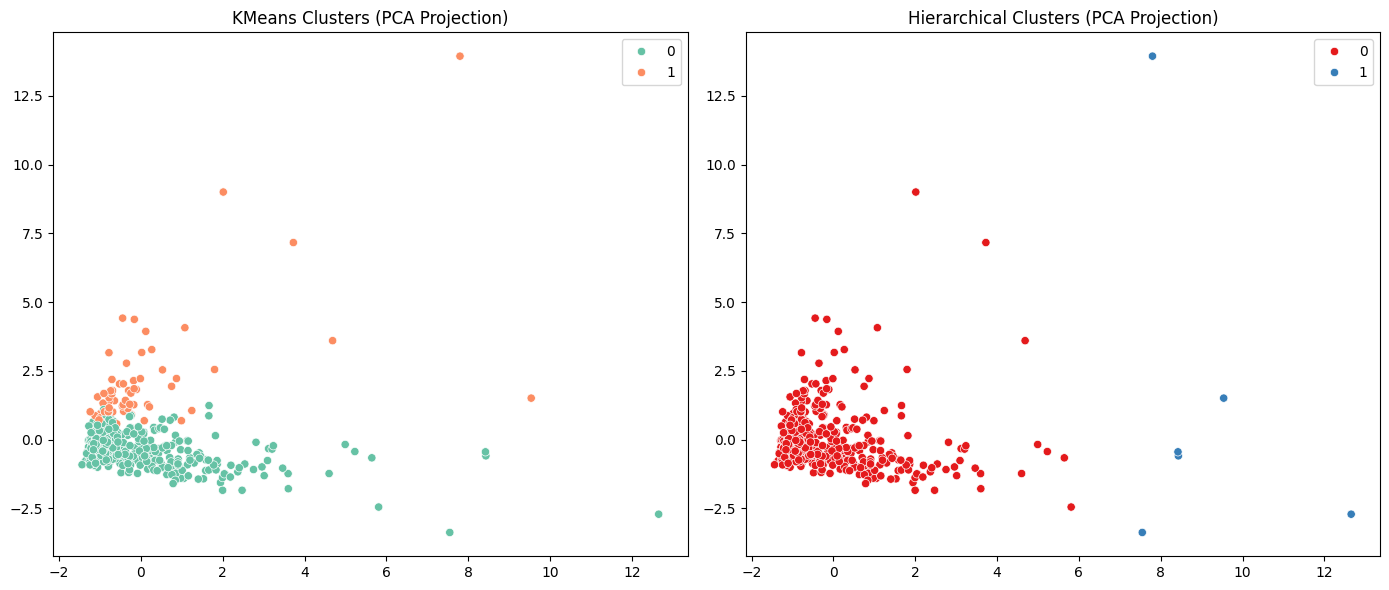

Number of clusters for KMeans and Hierarchical Clustering:  2


In [16]:
##### KMEANS
from sklearn.cluster import KMeans

N_CLUSTERS = 2
# Try clustering into n clusters
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add to original data
df_data['KMeans_Cluster'] = kmeans_labels

##### H-Cluster
from sklearn.cluster import AgglomerativeClustering

# Agglomerative clustering (Euclidean, Ward)
hc = AgglomerativeClustering(n_clusters=N_CLUSTERS, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

# Add to original data
df_data['Hierarchical_Cluster'] = hc_labels

#### PLOT 
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot both clustering outputs side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# KMeans
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set2', ax=axs[0])
axs[0].set_title("KMeans Clusters (PCA Projection)")

# Hierarchical
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hc_labels, palette='Set1', ax=axs[1])
axs[1].set_title("Hierarchical Clusters (PCA Projection)")

plt.tight_layout()
plt.show()
print(f'Number of clusters for KMeans and Hierarchical Clustering:  {N_CLUSTERS}')

Here we can see with higher number of clusters the models still work but seemingly struggle with outlier cases. With lower clusters there is some noise where points are either overly grouped in 1 cluster or have to much overlap.

### Results and Analysis

#### **RESULTS HERE ARE BASED ON N_CLUSTERS FROM HYPERTUNING

In [17]:
from sklearn.metrics import silhouette_score

# KMeans Silhouette Score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette:.4f}")

# Hierarchical Clustering Silhouette Score
hc_silhouette = silhouette_score(X_scaled, hc_labels)
print(f"Hierarchical Clustering Silhouette Score: {hc_silhouette:.4f}")

KMeans Silhouette Score: 0.3998
Hierarchical Clustering Silhouette Score: 0.7925


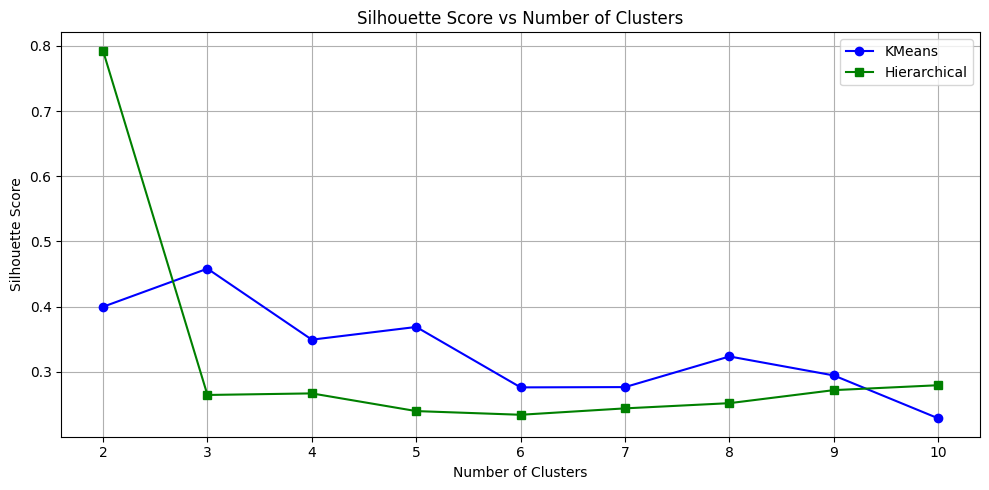

In [18]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sil_scores_kmeans = []
sil_scores_hier = []

cluster_range = range(2, 11)

for k in cluster_range:
    # KMeans
    km = KMeans(n_clusters=k, random_state=42)
    labels_km = km.fit_predict(X_scaled)
    score_km = silhouette_score(X_scaled, labels_km)
    sil_scores_kmeans.append(score_km)
    
    # Hierarchical Clustering
    hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels_hc = hc.fit_predict(X_scaled)
    score_hc = silhouette_score(X_scaled, labels_hc)
    sil_scores_hier.append(score_hc)

# Plot both silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, sil_scores_kmeans, marker='o', label='KMeans', color='blue')
plt.plot(cluster_range, sil_scores_hier, marker='s', label='Hierarchical', color='green')

plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion

From KMeans and Hierarchical clustering there have been different performance every time the model has run. This is because KMeans starts with randomly selected initial centroids, I have set a random_state and decomposition PCA to reduce this. Performance is typically around .5 Which is not tremendous but no terrible. Silhouette score is measured between -1 and 1, so the performance is in the upper quartile.

Under a very low number of n_cluster = 2, Hierarchical clustering does very well, however at all clusters higher than n = 2, KMeans outperforms til the number of clusters creates data that is not usable.

I did attempt a log transformation, but performance only decreased so I ommited that from the notebook.


### Citation
Cardoso, M. (2013). Wholesale customers [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5030X.

https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set/data